In [1]:
import pyNUISANCE as pn
import pyNuHepMC as nhm

In [2]:
evs = pn.EventSource("dune_argon_sf_10mega.nuwro.pb.gz")
if not evs:
    print("Error: failed to open input file")

[2024-02-29 11:41:54.457] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-GHEP3.so
[2024-02-29 11:41:54.490] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-NuWroevent1.so
[2024-02-29 11:41:54.495] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-neutvect.so
[2024-02-29 11:41:54.497] [info] EventSourceFactory: PathResolver::resolve filepath: dune_argon_sf_10mega.nuwro.pb.gz, exists: true
[2024-02-29 11:41:54.749] [info] Reading file dune_argon_sf_10mega.nuwro.pb.gz with native HepMC3EventSource


In [3]:
def enu_GeV(ev):
    return nhm.EventUtils.GetBeamParticle(ev).momentum().e() * nhm.EventUtils.ToMeVFactor(ev) * 1E-3
print(enu_GeV(evs.first()[0]))

2.2748704837946896


In [4]:
wt2k_disp = pn.Prob3plusplusWeightCalc()
wt2k_disp.set_parameters({"baseline:DUNE": 1, "t2k:bestfit": 1, "osc:numu_disp":1})
wt2k_app = pn.Prob3plusplusWeightCalc()
wt2k_app.set_parameters({"baseline:DUNE": 1, "t2k:bestfit": 1, "osc:numu_to_nue":1})

wnf5_disp = pn.Prob3plusplusWeightCalc()
wnf5_disp.set_parameters({"baseline:DUNE": 1, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_app = pn.Prob3plusplusWeightCalc()
wnf5_app.set_parameters({"baseline:DUNE": 1, "NuFit:5.2": 1, "osc:numu_to_nue":1})


[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set numu disappearance oscillation channel: 2 -> 2
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set baseline_km = 1300
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set DUNE baseline
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set sinsq_th12 = 0.297
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set sinsq_th13 = 0.0214
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set sinsq_th23 = 0.526
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set dmsq_21 = 7.37e-05
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set dmsq_atm = 0.002463
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set dcp_rad = 0
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set T2K bestfit parameters
[2024-02-29 11:41:54.781] [info] [Prob3plusplusWeightCalc]: Set numu to nue appearance oscillation channel: 2 -> 1
[2024-02-29 11:41:54.781] [info] 

In [5]:
print(pn.FrameGen(evs).limit(20)
      .add_column("enu_GeV",enu_GeV)
      .add_column("T2K B.F. P(numu->numu)", wt2k_disp.calc_weight)
      .add_column("T2K B.F. P(numu->nue)", wt2k_app.calc_weight)
      .add_column("NuFit 5.2 P(numu->numu)", wnf5_disp.calc_weight)
      .add_column("NuFit 5.2 P(numu->nue)", wnf5_app.calc_weight)
      .all())

 ------------------------------------------------------------------------------------
 | evt# | cvw | enu_GeV | T2K B.F. P($ | T2K B.F. P($ | NuFit 5.2 P$ | NuFit 5.2 P$ |
 ------------------------------------------------------------------------------------
 |    0 |   1 |   2.275 |      0.05437 |      0.06693 |      0.08036 |      0.07433 |
 |    1 |   1 |    14.3 |       0.9199 |     0.004287 |       0.9179 |     0.004895 |
 |    2 |   1 |    2.86 |      0.01832 |       0.0649 |      0.02232 |      0.07304 |
 |    3 |   1 |   3.728 |       0.2048 |      0.04962 |       0.1972 |      0.05627 |
 |    4 |   1 |    9.08 |       0.8092 |      0.01056 |       0.8047 |      0.01206 |
 |    5 |   1 |   3.237 |      0.08881 |      0.05852 |      0.08565 |      0.06614 |
 |    6 |   1 |   2.473 |     0.008372 |      0.06826 |      0.02523 |      0.07626 |
 |    7 |   1 |   1.916 |       0.2941 |        0.054 |       0.3381 |      0.05881 |
 |    8 |   1 |   1.988 |       0.2265 |      0.05799 

In [8]:
hf = pn.HistFrame(pn.binning.lin_space(100,0,8, "E_nu [GeV]"),"unosc")
hf.add_column("T2K B.F. P(numu->numu)")
hf.add_column("T2K B.F. P(numu->nue)")
hf.add_column("NuFit 5.2 P(numu->nue)")
hf.add_column("NuFit 5.2 P(numu->nue)")
for i, (ev, cvw) in enumerate(evs):
    enu = enu_GeV(ev)
    hf.fill(enu,cvw)
    hf.fill(enu,cvw*wt2k_disp.prob(enu),1)
    hf.fill(enu,cvw*wt2k_app.prob(enu),2)
    hf.fill(enu,cvw*wnf5_disp.prob(enu),3)
    hf.fill(enu,cvw*wnf5_app.prob(enu),4)
    if i >= 1E6:
        break
print(hf)

 ----------------------------------------------------------------------------------------------------------------------
 |     unosc |   err | T2K B.F. P($ |    err | T2K B.F. P($ |     err | NuFit 5.2 P$ |    err | NuFit 5.2 P$ |    err |
 ----------------------------------------------------------------------------------------------------------------------
 |         0 |     0 |            0 |      0 |            0 |       0 |            0 |      0 |            0 |      0 |
 |         6 | 2.449 |        1.229 | 0.5967 |        1.676 |  0.7031 |        1.272 | 0.8106 |        1.278 | 0.5413 |
 |        82 | 9.055 |         31.4 |  4.544 |         10.4 |   1.269 |        37.66 |  5.047 |        9.095 |  1.139 |
 |       340 | 18.44 |        157.3 |  10.25 |        29.73 |   1.751 |        140.1 |  9.429 |        29.62 |  1.759 |
 |       696 | 26.38 |        251.3 |  12.87 |        40.84 |   1.724 |        271.1 |  13.89 |        38.54 |   1.66 |
 |      1113 | 33.36 |        872.2 |  2

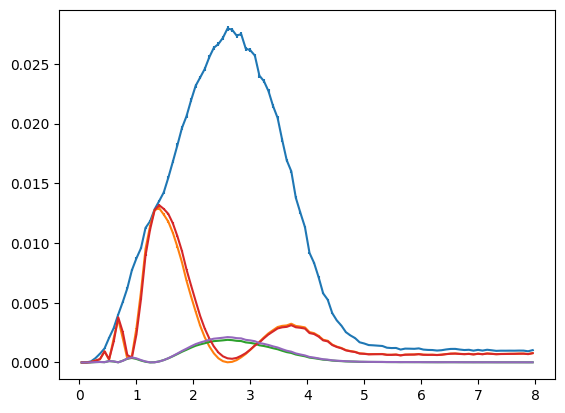

In [9]:
import matplotlib.pyplot as plt
import numpy as np

bin_centers = [ ((x[0].min + x[0].max) / 2.0) for x in hf.binning.bin_info.extents ]
bin_widths = [ (x[0].max - x[0].min) for x in hf.binning.bin_info.extents ]

sf = evs.fatx()/evs.sumw()

plt.errorbar(bin_centers,hf.contents[:,0]*sf,yerr=np.sqrt(hf.variance[:,0])*sf)
plt.errorbar(bin_centers,hf.contents[:,1]*sf,yerr=np.sqrt(hf.variance[:,1])*sf)
plt.errorbar(bin_centers,hf.contents[:,2]*sf,yerr=np.sqrt(hf.variance[:,2])*sf)
plt.errorbar(bin_centers,hf.contents[:,3]*sf,yerr=np.sqrt(hf.variance[:,3])*sf)
plt.errorbar(bin_centers,hf.contents[:,4]*sf,yerr=np.sqrt(hf.variance[:,4])*sf)
plt.show()